In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [45]:
total_df = pd.DataFrame()
startup_df = pd.DataFrame()

for i in range(30):
    path = f"non-local-test-experiments/round_{i}/peer0/evaluation_results/evaluation.csv"
    path_peer1 = f"non-local-ip-test-1/round_{i}/peer0/evaluation_results/evaluation.csv"
    df = pd.read_csv(path)
    df_peer1 = pd.read_csv(path_peer1)
    df['delta'] = 5
    df_peer1['delta'] = 5
    df['round'] = i
    df_peer1['round'] = i

    path = f"non-local-test-experiments/round_{i}/peer0/evaluation_results/startup.csv"
    path_peer1 = f"non-local-ip-test-1/round_{i}/peer0/evaluation_results/startup.csv"
    start_df = pd.read_csv(path)
    start_df_peer1 = pd.read_csv(path_peer1)
    # Taking the first row of the start_df to get the start_time
    start_time = start_df['start_time'].iloc[0]
    start_time_peer1 = start_df_peer1['start_time'].iloc[0]
    # Takomg the last row of the start_df to get the end_time
    end_time = start_df['end_time'].iloc[-1]
    end_time_peer1 = start_df_peer1['end_time'].iloc[-1]
    # Calculating the elapsed time
    elapsed_time = end_time - start_time
    elapsed_time_peer1 = end_time_peer1 - start_time_peer1
    # Getting the port
    port = start_df['portnum'].iloc[0]
    port_peer1 = start_df_peer1['portnum'].iloc[0]
    row = pd.DataFrame({'start_time': [start_time], 'end_time': [end_time], 'elapsed_time': [elapsed_time], 'port': [port], 'round': [i]})
    row_peer1 = pd.DataFrame({'start_time': [start_time_peer1], 'end_time': [end_time_peer1], 'elapsed_time': [elapsed_time_peer1], 'port': [port_peer1 + 1], 'round': [i]})

    total_df = pd.concat([total_df, df])
    total_df = pd.concat([total_df, df_peer1])
    startup_df = pd.concat([startup_df, row])
    startup_df = pd.concat([startup_df, row_peer1])

In [46]:
total_df

,start_time,end_time,delta,elapsed_time,message_size,sending,from,to,num_peers,message_type,round
0,1.721651e+09,1.721651e+09,5,0.000120,1900,False,80.112.187.103:8090,80.57.135.211:8090,1,SEND_MODEL,0
1,1.721651e+09,1.721651e+09,5,0.030930,3892,True,80.57.135.211:8090,80.112.187.103:8090,1,SEND_MODEL,0
2,1.721651e+09,1.721651e+09,5,0.000367,4422,False,80.112.187.103:8090,80.57.135.211:8090,1,SEND_MODEL,0
3,1.721651e+09,1.721651e+09,5,0.017011,4388,True,80.57.135.211:8090,80.112.187.103:8090,1,SEND_MODEL,0
4,1.721651e+09,1.721651e+09,5,0.000173,4388,False,80.112.187.103:8090,80.57.135.211:8090,1,SEND_MODEL,0
...,...,...,...,...,...,...,...,...,...,...,...
121,1.721661e+09,1.721661e+09,5,0.000198,11467,False,80.57.135.211:8090,80.112.187.103:8090,1,SEND_MODEL,29
122,1.721661e+09,1.721661e+09,5,0.016680,11433,True,80.112.187.103:8090,80.57.135.211:8090,1,SEND_MODEL,29
123,1.721661e+09,1.721661e+09,5,0.000148,11467,False,80.57.135.211:8090,80.112.187.103:8090,1,SEND_MODEL,29
124,1.721661e+09,1.721661e+09,5,0.018326,11433,True,80.112.187.103:8090,80.57.135.211:8090,1,SEND_MODEL,29


In [47]:
startup_df['start_time'] = startup_df['start_time'].astype(float)
startup_df['start_time'] = startup_df['start_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df['end_time'] = startup_df['end_time'].astype(float)
startup_df['end_time'] = startup_df['end_time'].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

startup_df

,start_time,end_time,elapsed_time,port,round
0,2024-07-22 15:16:11,2024-07-22 15:16:41,29.815889,8090,0
0,2024-07-22 15:16:09,2024-07-22 15:16:16,7.043853,8091,0
0,2024-07-22 15:22:25,2024-07-22 15:22:33,8.637964,8090,1
0,2024-07-22 15:22:22,2024-07-22 15:22:32,9.300118,8091,1
0,2024-07-22 15:28:14,2024-07-22 15:28:22,7.505512,8090,2
0,2024-07-22 15:28:15,2024-07-22 15:28:22,6.964240,8091,2
0,2024-07-22 15:34:03,2024-07-22 15:34:11,7.523898,8090,3
0,2024-07-22 15:34:04,2024-07-22 15:34:14,9.305291,8091,3
0,2024-07-22 15:39:56,2024-07-22 15:40:03,7.586694,8090,4
0,2024-07-22 15:39:58,2024-07-22 15:40:05,6.969048,8091,4


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/3714551866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/3714551866.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)


<Axes: title={'center': 'Startup Time for Each Peer'}, xlabel='Peers', ylabel='Elapsed Time [s]'>

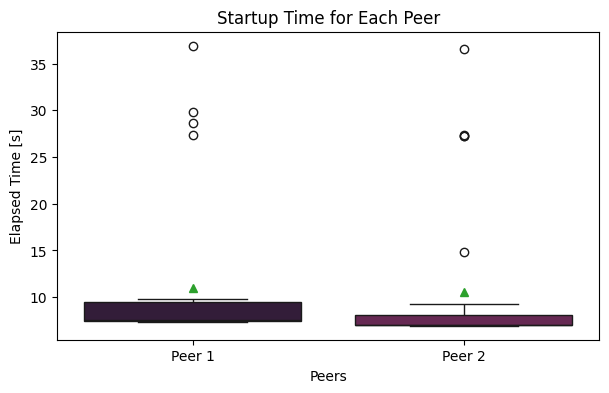

In [48]:
# Define a list of colors
plt.figure(figsize=(7, 4))
colors = sns.color_palette('rocket')[0:10]

plt.xlabel('Peers')
plt.ylabel('Elapsed Time [s]')
plt.title('Startup Time for Each Peer')
plt.xticks(ticks=[0, 1], labels=['Peer 1', 'Peer 2'])

sns.boxplot(x='port', y='elapsed_time', data=startup_df, palette=colors, showmeans=True)

In [49]:
# Statistical summary of the startup time
startup_df.groupby('port').describe()['elapsed_time']

,count,mean,std,min,25%,50%,75%,max
port,,,,,,,,
8090,30.0,10.970540,8.022189,7.367193,7.496981,7.572340,9.444160,36.910918
8091,30.0,10.534518,7.902594,6.938303,6.966895,7.016075,8.133211,36.540038


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/287400596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000], labels=['0-5000', '5000-10000', '10000-15000'])
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/287400596.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/287400596.py:7: UserWarning: The palette list has more values (6) than needed

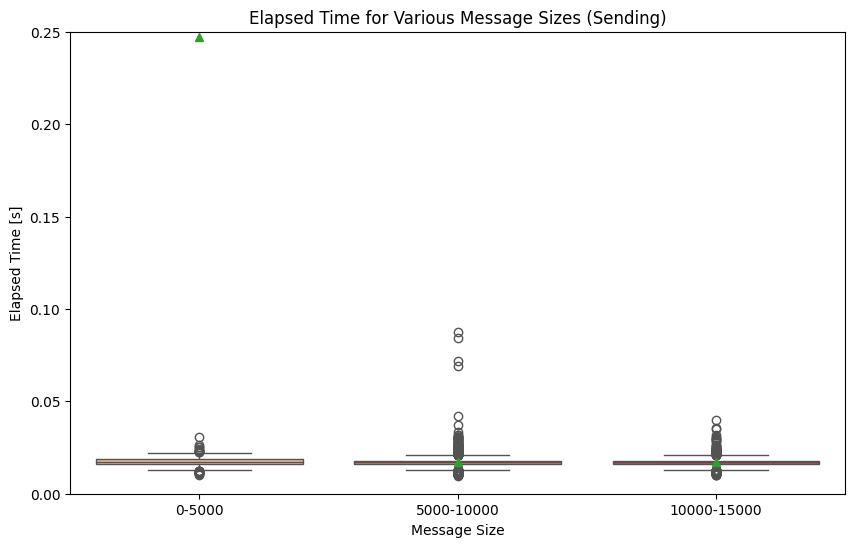

In [50]:
plt.figure(figsize=(10,6))
colors = sns.color_palette('rocket_r')

temp = total_df[(total_df['num_peers'] == 1) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == True)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000], labels=['0-5000', '5000-10000', '10000-15000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)

plt.ylim(0, 0.25)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Sending)')

plt.show()

In [51]:
temp.groupby('message_size').describe()['elapsed_time']

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/1357080292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby('message_size').describe()['elapsed_time']


,count,mean,std,min,25%,50%,75%,max
message_size,,,,,,,,
0-5000,383.0,0.247409,0.656883,0.010154,0.016232,0.017277,0.018729,2.145750
5000-10000,2230.0,0.017247,0.003713,0.009607,0.015900,0.016980,0.017913,0.087573
10000-15000,1138.0,0.017375,0.007542,0.010070,0.015964,0.016999,0.017921,0.254794


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/923973089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000], labels=['0-5000', '5000-10000', '10000-15000'])
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/923973089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/923973089.py:6: UserWarning: The palette list has more values (6) than needed

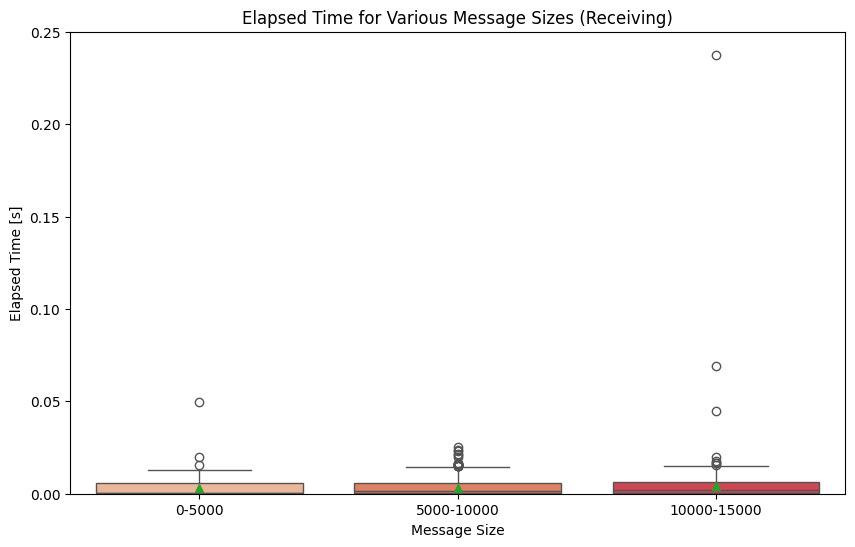

In [52]:
plt.figure(figsize=(10,6))

temp = total_df[(total_df['num_peers'] == 1) & (total_df['message_type'] == 'SEND_MODEL') & (total_df['sending'] == False)]
temp['message_size'] = pd.cut(temp['message_size'], bins=[0, 5000, 10000, 15000], labels=['0-5000', '5000-10000', '10000-15000'])

sns.boxplot(x='message_size', y='elapsed_time', data=temp, palette=colors, showmeans=True)

plt.xlabel('Message Size')
plt.ylabel('Elapsed Time [s]')
plt.title('Elapsed Time for Various Message Sizes (Receiving)')

plt.ylim(0, 0.25)

plt.show()

In [53]:
temp.groupby('message_size').describe()['elapsed_time']

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/1357080292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby('message_size').describe()['elapsed_time']


,count,mean,std,min,25%,50%,75%,max
message_size,,,,,,,,
0-5000,328.0,0.003019,0.004124,0.000097,0.000156,0.000440,0.005832,0.049819
5000-10000,2228.0,0.003298,0.003476,0.000105,0.000209,0.001665,0.006036,0.025424
10000-15000,1147.0,0.003998,0.008038,0.000105,0.000521,0.002178,0.006414,0.237253


/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/566024231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)


Text(0.5, 1.0, 'Message Size Distribution')

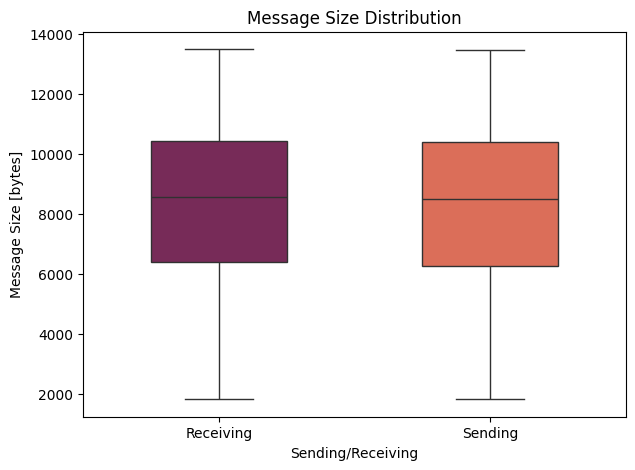

In [54]:
fig, ax = plt.subplots(figsize=(7, 5))

sent_data = total_df[total_df["message_type"] == "SEND_MODEL"]

sns.boxplot(x="sending", y="message_size", data=sent_data, ax=ax, palette="rocket", width=0.5)

plt.xticks(ticks=[True, False], labels=["Sending", "Receiving"])
plt.xlabel('Sending/Receiving')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Distribution')

/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/3167673020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_data['cumulative_elapsed_time'] = sent_data['start_time'].diff().fillna(0).cumsum()
/var/folders/0m/_y7l8ln90mlbfr427hwkgw000000gn/T/ipykernel_59747/3167673020.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="cumulative_elapsed_time", y="message_size", data=sent_data, ax=ax, marker="o", palette="rocket")


Text(0.5, 1.0, 'Message Size Over Time')

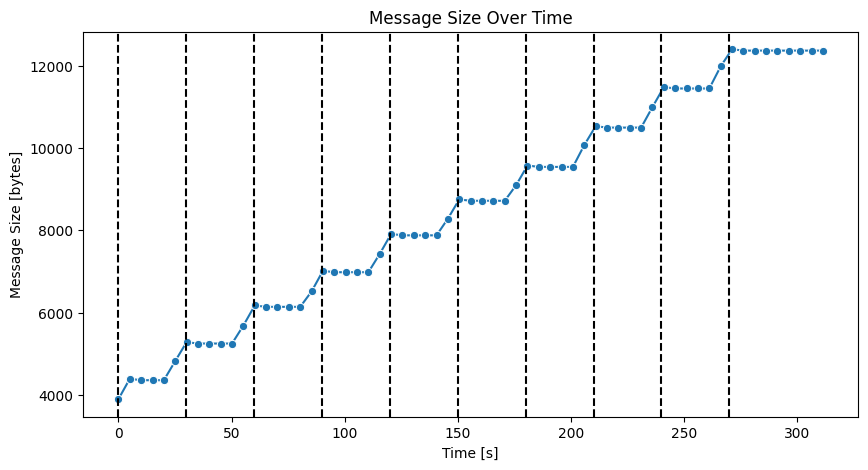

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

sent_data = total_df[(total_df["message_type"] == "SEND_MODEL") & (total_df["sending"] == True) & (total_df["from"] == "80.57.135.211:8090") & (total_df["round"] == 0)]

sent_data['cumulative_elapsed_time'] = sent_data['start_time'].diff().fillna(0).cumsum()

sns.lineplot(x="cumulative_elapsed_time", y="message_size", data=sent_data, ax=ax, marker="o", palette="rocket")

for i in range(0, 300, 30):
    plt.axvline(x=i, color="black", linestyle="--")

plt.xlabel('Time [s]')
plt.ylabel('Message Size [bytes]')
plt.title('Message Size Over Time')